In [1]:
# tensor
import tensorflow as tf
import numpy as np

In [2]:
# one dim tensor
tensor1 = tf.constant([3, 4.0, 6, 7, 8, .9])
print(tensor1)

tf.Tensor([3.  4.  6.  7.  8.  0.9], shape=(6,), dtype=float32)


2024-04-26 15:06:32.684834: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-04-26 15:06:32.684853: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-04-26 15:06:32.684862: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-04-26 15:06:32.685096: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-26 15:06:32.685113: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
tensor2 = tf.constant([[0, 1, 2], [2, 3, 4], [6, 7, 8]])
print(tensor2)

tf.Tensor(
[[0 1 2]
 [2 3 4]
 [6 7 8]], shape=(3, 3), dtype=int32)


# To create ANN to predict handwritten digit classification

In [4]:
# load the dataset
from tensorflow.keras.datasets import mnist
print('data loaded')

data loaded


In [5]:
# create train set & test set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape # number of image, height of image, width of image

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

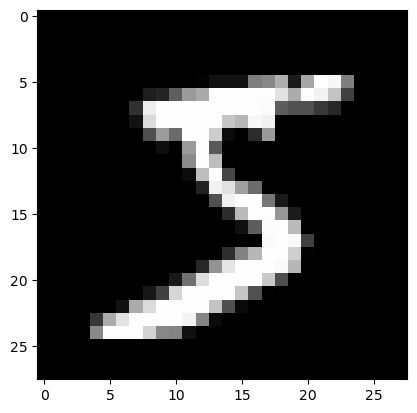

In [10]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.show()

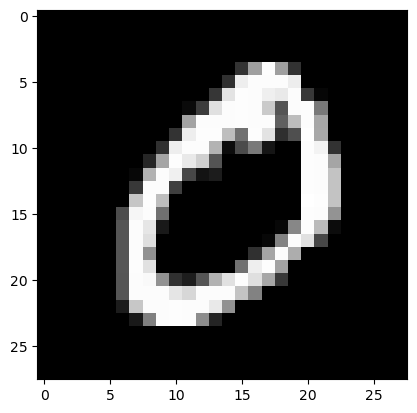

In [11]:
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [12]:
# preprocessing
# reshape the train & test data to one dim array becoz ANN require one dimension
# 28 * 28 --- 784

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [13]:
X_train.shape

(60000, 784)

In [14]:
# normalize the pixels from 0 to 1, right now pixels are from 0 to 255
X_train = X_train/255.
X_test = X_test/255.

In [15]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [16]:
# convert class vectors into one hot encoding
from tensorflow.keras.utils import to_categorical

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [17]:
y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

1. create the architecture
2. compile the model
3. fit the model
4. evaluation & predict

In [18]:
# import the library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
print('Imported')

Imported


#Create Architecture
1. 3 hidden layers
2. Nodes in each hidden layers 100, 64, 32
3. Activation function - Retified Linear Unit Hidden Layer (Relu hidden layer)
4. output layer - Softmax

In [19]:
model = Sequential()

# First Hidden Layer
model.add(Dense(100, activation='relu', input_shape=(784, )))

# Second Hidden Layer
model.add(Dense(64, activation='relu'))

# Third Hidden Layer
model.add(Dense(32, activation='relu'))

#output layer
model.add(Dense(10, activation='softmax'))

/Users/deepthy/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,374 (341.30 KB)

 Trainable params: 87,374 (341.30 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model
1. loss function
2. optimizer
3. evaluate accuracy

In [21]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # adapative momemtum estimation optimizer
print('model is compiled')

model is compiled


In [22]:
# initial weights & bias
for layer in model.layers:
    if hasattr(layer, 'weights'):
      weights, biases = layer.get_weights()
      print('shape', weights.shape)
      print(f'layer name {layer.name}:')
      print(weights)
      print('shape', biases.shape)
      print(f'layer name {layer.name}:')
      print(biases)

shape (784, 100)
layer name dense:
[[ 0.02263865  0.02921902  0.06898206 ... -0.05039436  0.05087911
   0.01370743]
 [ 0.0659502   0.04592711 -0.0788773  ... -0.04980001  0.04142802
  -0.07405189]
 [-0.03454633 -0.07663668  0.01891563 ...  0.03991799 -0.08024246
   0.0190604 ]
 ...
 [-0.02111039  0.04281606  0.03448995 ...  0.07505387 -0.07449765
  -0.04494523]
 [ 0.05245288 -0.05701698 -0.04265593 ...  0.06185088  0.06235006
   0.01029044]
 [-0.05060641  0.03348783 -0.04081778 ...  0.07403015 -0.03877049
   0.07045509]]
shape (100,)
layer name dense:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
shape (100, 64)
layer name dense_1:
[[-0.06886529 -0.07486578 -0.12945217 ... -0.10596382 -0.08969503
  -0.01449446]
 [ 0.13676317 -0.18

In [23]:
# Evaluate & predict

In [24]:
# training
batch_size = 128
epochs = 10 # complete cycle where whole training data is passed

history = model.fit(X_train, y_train, batch_size=batch_size, epochs = epochs, validation_data=(X_test, y_test))

Epoch 1/10


2024-04-26 15:06:34.667402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 62ms/step - accuracy: 0.7692 - loss: 0.7350 - val_accuracy: 0.9468 - val_loss: 0.1686
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9570 - loss: 0.1460 - val_accuracy: 0.9646 - val_loss: 0.1167
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9716 - loss: 0.0978 - val_accuracy: 0.9698 - val_loss: 0.1011
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9780 - loss: 0.0733 - val_accuracy: 0.9733 - val_loss: 0.0858
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9816 - loss: 0.0583 - val_accuracy: 0.9755 - val_loss: 0.0807
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9856 - loss: 0.0464 - val_accuracy: 0.9750 - val_loss: 0.0837
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9888 - loss: 0.0360 - val_accuracy: 0.9718 - val_loss: 0.0929
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9898 - loss: 0.0323 - val_accurac

In [25]:
# evaluate the model
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9692 - loss: 0.1160


[0.09030301123857498, 0.9758999943733215]

In [26]:
# train accuracy
model.evaluate(X_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9922 - loss: 0.0220


[0.022122662514448166, 0.9922999739646912]

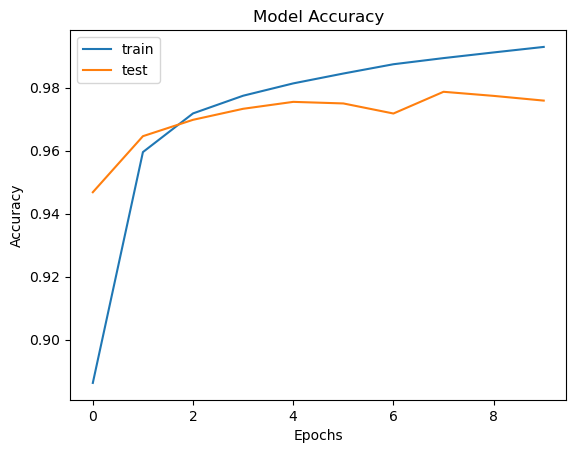

In [27]:
# plot the graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='best')
plt.show()

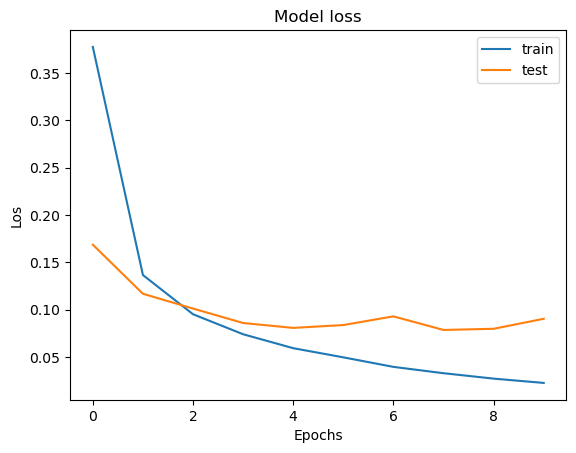

In [28]:
# plot the losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Los')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [29]:
# save the model
model.save('handwritten_digit_prediction.h5')
print("model saved")

model saved


In [30]:
# load the model
from tensorflow.keras.models import load_model

loaded_model = load_model('handwritten_digit_prediction.h5')
print('model loaded')


model loaded


In [31]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,376 (341.32 KB)

 Trainable params: 87,374 (341.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [32]:
# predictions
y_pred = loaded_model(X_test)

In [33]:
y_pred[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([5.9362428e-08, 2.1807281e-07, 2.6801156e-06, 4.3389750e-06,
       1.0862290e-12, 3.1838059e-08, 9.6997464e-13, 9.9999273e-01,
       8.5682634e-09, 1.6577419e-09], dtype=float32)>

In [34]:
np.argmax(y_pred[0])

7

In [35]:
# see all outputs
y_predict = np.argmax(y_pred, axis=1)

In [47]:
y_predict

array([7, 2, 1, ..., 4, 5, 6])

In [37]:
# create train set & test set
(X_train1, y_train1), (X_test1, y_test1) = mnist.load_data()

In [46]:
y_test1

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

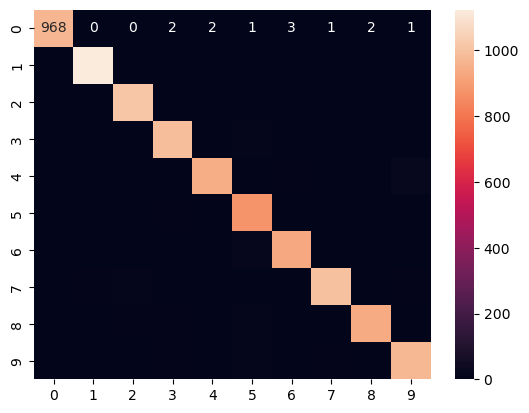

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_predict)

import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [39]:
# initial weights & bias
for layer in loaded_model.layers:
    if hasattr(layer, 'weights'):
      weights, biases = layer.get_weights()
      print('shape', weights.shape)
      print(f'layer name {layer.name}:')
      print(weights)
      print('shape', biases.shape)
      print(f'layer name {layer.name}:')
      print(biases)

shape (784, 100)
layer name dense:
[[ 0.02263865  0.02921902  0.06898206 ... -0.05039436  0.05087911
   0.01370743]
 [ 0.0659502   0.04592711 -0.0788773  ... -0.04980001  0.04142802
  -0.07405189]
 [-0.03454633 -0.07663668  0.01891563 ...  0.03991799 -0.08024246
   0.0190604 ]
 ...
 [-0.02111039  0.04281606  0.03448995 ...  0.07505387 -0.07449765
  -0.04494523]
 [ 0.05245288 -0.05701698 -0.04265593 ...  0.06185088  0.06235006
   0.01029044]
 [-0.05060641  0.03348783 -0.04081778 ...  0.07403015 -0.03877049
   0.07045509]]
shape (100,)
layer name dense:
[-9.81627614e-04 -4.61008884e-02  1.17380302e-02 -2.58481801e-02
  5.23001142e-03  8.75757188e-02  9.30694025e-03  3.71050388e-02
 -1.30996453e-02 -3.67798358e-02  4.34765667e-02  9.06970128e-02
  1.67549606e-02 -4.57406277e-03  6.07265308e-02  3.71324494e-02
  9.75224376e-02 -4.72964495e-02 -1.24621475e-02  2.11100443e-03
  8.15265924e-02 -3.40727251e-03  9.16296616e-02 -4.37600259e-03
  2.86377184e-02 -2.00192593e-02  1.68375671e-01  4.

In [56]:
import numpy as np
from PIL import Image

new_image = Image.open('sample_image.png')

#Convert the image to grey scale
new_image = new_image.convert('L').resize((28, 28))

new_digit = np.array(new_image) / 255.0

new_digit = new_digit.reshape((1, 784))

predictions = loaded_model.predict(new_digit)

predicted_digit = np.argmax(predictions)

print(predictions)
print("Predicted digit is ", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[2.88844042e-08 2.00586996e-07 3.12669204e-06 1.94529002e-06
  9.61710637e-13 1.34225315e-08 4.91751496e-13 9.99994636e-01
  4.31331060e-09 1.40079426e-09]]
Predicted digit is  7
